<a href="https://colab.research.google.com/github/woodstone10/data-intelligence-lab/blob/main/prediction_comparison_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction accuracy comparison

---
- Logistic Regression
- Random Forest
- Neural Network
- Gaussian NB
- Decision Tree Classifier
- SVM



---

 refer to
   https://medium.com/analytics-vidhya/boston-house-price-prediction-using-machine-learning-ad3750a866cd
   https://www.kaggle.com/shreayan98c/boston-house-price-prediction

 Comparison between algorithms
   1. Neural Network (TensorFlow Keras)
   2. Linear Regression (Scikit-learn)
       : To find the value of θ that minimizes the cost function, there is a closed-form solution
       —in other words, a mathematical equation that gives the result directly. This is called
       the Normal Equation
   3. SVM (Support Vector Machines) Regression (Scikit-learn)
       : SVM algorithm is quite versatile: not only does it sup‐
       port linear and nonlinear classification, but it also supports linear and nonlinear
       regression.
   4. Random Forest Regression (Scikit-learn)
       : Random Forest is an ensemble of Decision Trees, generally
       trained via the bagging method
   5. XGBoost Regression (XGBoost)
       : The general idea of most
       boosting methods is to train predictors sequentially, each trying to correct its prede‐
       cessor.
       In fact, XGBoost is often an important component of the winning
       entries in ML competitions. XGBoost’s API is quite similar to Scikit-Learn’s


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston # train data
from sklearn import metrics
import tensorflow as tf # model for Keras Neural Network
from sklearn.linear_model import LinearRegression # model for Linear Regression
from sklearn.ensemble import RandomForestRegressor # model for Random Forest Regressor
from xgboost import XGBRegressor # modem for XGBoost Regressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm # model for SVM REgressor

In [ ]:
# Train data, load from sklearn dataset load_boston()
# As well we can also able to get the dataset from the sklearn datasets.
# Yup! It’s available into the sklearn Dataset.
boston = load_boston()
x = boston['data']
y = boston['target']
features = boston['feature_names']

In [ ]:
# variables
# 1. CRIM per capital crime rate by town
# 2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. INDUS proportion of non-retail business acres per town
# 4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 5. NOX nitric oxides concentration (parts per 10 million)
# 6. RM average number of rooms per dwelling
# 7. AGE proportion of owner-occupied units built prior to 1940
# 8. DIS weighted distances to five Boston employment centers
# 9. RAD index of accessibility to radial highways
# 10.TAX full-value property-tax rate per 10,000 USD
# 11. PTRATIO pupil-teacher ratio by town
# 12. B 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
# 13. LSTAT % lower status of the population
print(features)
print(x.shape, y.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13) (506,)


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT       Price
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000

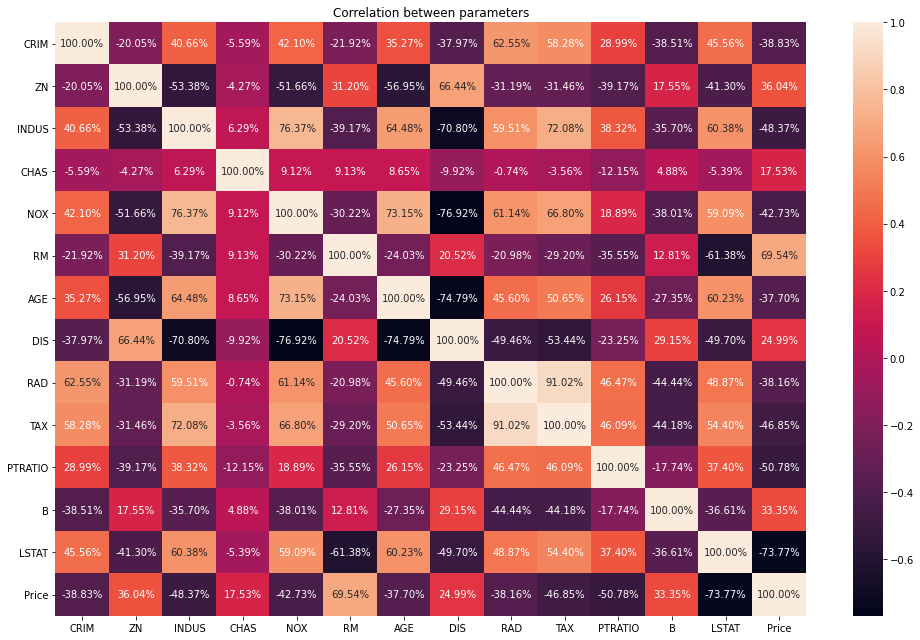

In [ ]:
df = pd.DataFrame(x, columns=features, index=None)
df['Price'] = y
print(df.head())
print(df.describe())
corr = df.corr() # Correlation between parameters
print("Correlation:\n",corr)
plt.figure(figsize=(14,9))
sns.heatmap(corr, fmt='.2%', annot=True)
plt.title("Correlation between parameters")
plt.tight_layout()
plt.show()

## Model 1. Keras Neural Network

In [ ]:
X = tf.keras.layers.Input(shape=[13]) # [number of independent var]
Y = tf.keras.layers.Dense(1)(X) # (number of dependent var) (independent var)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse') # Compile
model.fit(x,y,epochs=3000) # Training
y_pred_tf_keras = model.predict(x)
accuracy_tf_keras = metrics.r2_score(y, y_pred_tf_keras)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
16/16 [==============================] - 0s 2ms/step - loss: 34.2308
Epoch 502/3000
16/16 [==============================] - 0s 2ms/step - loss: 35.1082
Epoch 503/3000
16/16 [==============================] - 0s 2ms/step - loss: 34.1125
Epoch 504/3000
16/16 [==============================] - 0s 1ms/step - loss: 29.4845
Epoch 505/3000
16/16 [==============================] - 0s 1ms/step - loss: 31.6184
Epoch 506/3000
16/16 [==============================] - 0s 2ms/step - loss: 33.4781
Epoch 507/3000
16/16 [==============================] - 0s 2ms/step - loss: 30.4492
Epoch 508/3000
16/16 [==============================] - 0s 2ms/step - loss: 29.0479
Epoch 509/3000
16/16 [==============================] - 0s 1ms/step - loss: 35.0294
Epoch 510/3000
16/16 [==============================] - 0s 1ms/step - loss: 30.5321
Epoch 511/3000
16/16 [==============================] - 0s 1ms/step - loss: 29.4299
Epoch 512/3000
16/16 [===

## Model 2. Scikit-learn Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x,y)
y_pred_sklearn_linearRegression = model.predict(x)
# print("Training Accuracy:", model.score(x,y)*100)
accuracy_sklearn_linearRegression = metrics.r2_score(y, y_pred_sklearn_linearRegression)
# weights = model.get_weights()
# print("weight:\n",weights)

## Model 3. SVM (Support Vector Machines) Regressor

In [ ]:
sc = StandardScaler()
x_ = sc.fit_transform(x)
model = svm.SVR()
model.fit(x_,y)
y_pred_sklearn_svmRegressor = model.predict(x_)
accuracy_sklearn_svmRegressor = metrics.r2_score(y, y_pred_sklearn_svmRegressor)

## Model 4. Random Forest Regressor

In [ ]:
model = RandomForestRegressor()
model.fit(x,y)
y_pred_sklearn_RandomForestRegressor = model.predict(x)
accuracy_sklearn_RandomForestRegressor = metrics.r2_score(y, y_pred_sklearn_RandomForestRegressor)


## Model 5. XGBoost Regressor

In [ ]:
model = XGBRegressor()
model.fit(x,y)
y_pred_xgboost_xgbRegressor = model.predict(x)
accuracy_xgboost_xgbRegressor = metrics.r2_score(y, y_pred_xgboost_xgbRegressor)


[03:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Comparison between Models

                      Model  R-squared Score
3  Random Forest Regression        98.291790
4        XGBoost Regression        97.196468
1         Linear Regression        74.064266
0      Keras Neural Network        71.759234
2            SVM Regression        70.282857


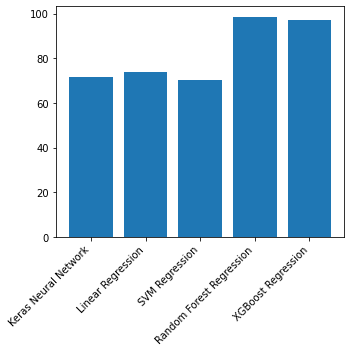

In [ ]:
models = pd.DataFrame({
    'Model': ['Keras Neural Network',
              'Linear Regression',
              'SVM Regression',
              'Random Forest Regression',
              'XGBoost Regression'],
    'R-squared Score': [accuracy_tf_keras*100,
                        accuracy_sklearn_linearRegression*100,
                        accuracy_sklearn_svmRegressor*100,
                        accuracy_sklearn_RandomForestRegressor*100,
                        accuracy_xgboost_xgbRegressor*100
                        ]})
print(models.sort_values(by='R-squared Score', ascending=False))
plt.figure(figsize=(5,5))
plt.bar(models['Model'], models['R-squared Score'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

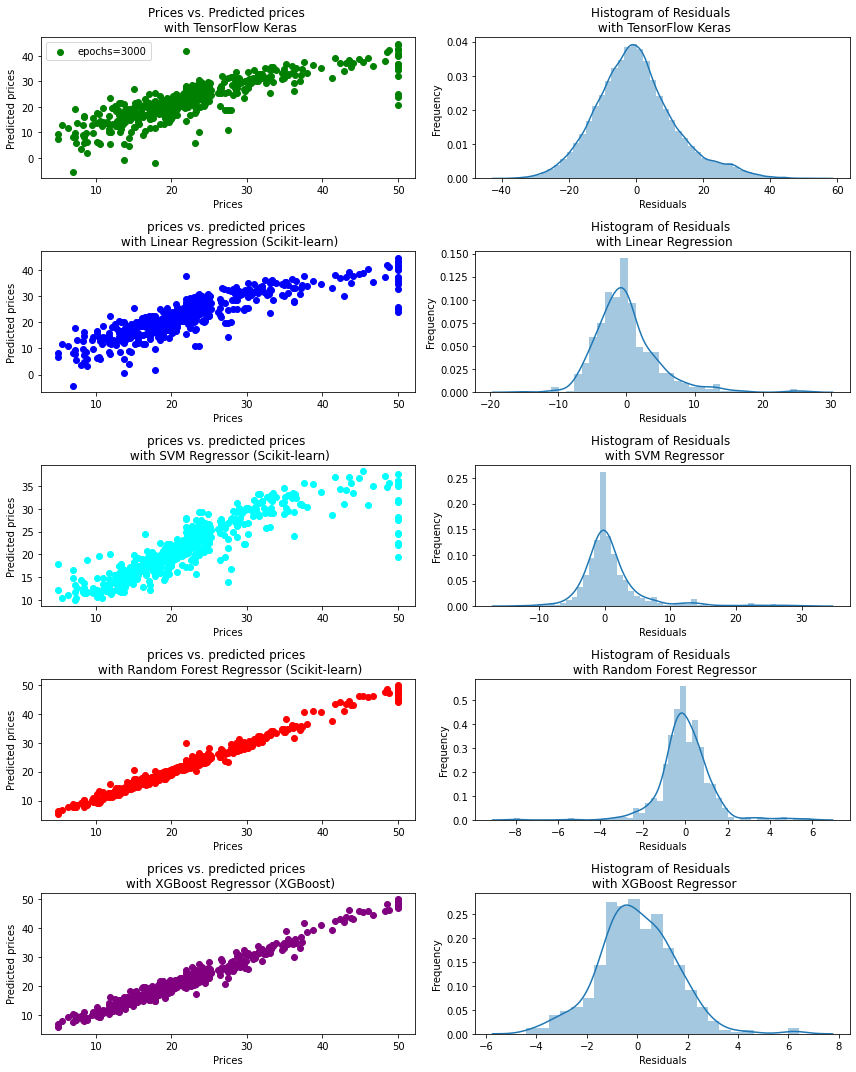

In [ ]:
plt.figure(figsize=(12,15))
plt.subplot(5,2,1)
plt.scatter(y, y_pred_tf_keras, color="green", label="epochs=3000")
plt.title("Prices vs. Predicted prices \n with TensorFlow Keras")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.legend()
plt.subplot(5,2,2)
sns.distplot(y-y_pred_tf_keras)
plt.title("Histogram of Residuals \n with TensorFlow Keras")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.subplot(5,2,3)
plt.scatter(y, y_pred_sklearn_linearRegression, color="blue")
plt.title("prices vs. predicted prices \n with Linear Regression (Scikit-learn)")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.subplot(5,2,4)
sns.distplot(y-y_pred_sklearn_linearRegression)
plt.title("Histogram of Residuals \n with Linear Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.subplot(5,2,5)
plt.scatter(y, y_pred_sklearn_svmRegressor, color="cyan")
plt.title("prices vs. predicted prices \n with SVM Regressor (Scikit-learn)")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.subplot(5,2,6)
sns.distplot(y-y_pred_sklearn_svmRegressor)
plt.title("Histogram of Residuals \n with SVM Regressor")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.subplot(5,2,7)
plt.scatter(y, y_pred_sklearn_RandomForestRegressor, color="red")
plt.title("prices vs. predicted prices \n with Random Forest Regressor (Scikit-learn)")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.subplot(5,2,8)
sns.distplot(y-y_pred_sklearn_RandomForestRegressor)
plt.title("Histogram of Residuals \n with Random Forest Regressor")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.subplot(5,2,9)
plt.scatter(y, y_pred_xgboost_xgbRegressor, color="purple")
plt.title("prices vs. predicted prices \n with XGBoost Regressor (XGBoost)")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.subplot(5,2,10)
sns.distplot(y-y_pred_xgboost_xgbRegressor)
plt.title("Histogram of Residuals \n with XGBoost Regressor")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()